In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)

In [13]:
import os

In [14]:
os.chdir("C:/Users/Nisha pujari/Documents/nisha study ds")

In [15]:
df=pd.read_csv("playstore-analysis.csv")

In [16]:
df.shape

(10841, 13)

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1. Data clean up – Missing value treatment

#### a. Drop records where rating is missing since rating is our target/study variable
#### answer- dropped the records where rating was missing and checked

In [18]:
df=df.dropna(subset=['Rating'])

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [20]:
df.shape

(9367, 13)

####  b. Check the null values for the Android Ver column
####  Answer- 3 null values found in 'Android ver' column

In [21]:
df['Android Ver'].isnull().sum()

3

#### i. Are all 3 records having the same problem?
#### Answer- first 2 records  have null value at only column of 'Android Ver' whereas third record has null value at 2 columns namely 'Android Ver' and 'Content Rating' and checked

In [22]:
df1=df[df['Android Ver'].isnull()]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
#### answer- rowno 10472 is dropped having null values at content rating and android ver,shape of df has changed from (9367,13) to (9366,13),also by checking the app is not found in dataframe and checked

In [23]:
df=df.drop(labels=10472, axis=0)
df.shape

(9366, 13)

In [24]:
df.loc[(df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### iii. Replace remaining missing values with the mode
#### answer- replaced remaining missing values in android ver with mode and checked

In [25]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [26]:
df.loc[(df['App'] == '[substratum] Vacuum: P')]#after replacing null vakues at android ver with mode

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


In [27]:
df.loc[(df['App'] == 'Pi Dark [substratum]')]#after replacing null vakues at android ver with mode

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


#### c. Current ver – replace with most common value
#### answer- replaced the null values in current ver column with mode values in same column and checked

In [28]:
dcurv=df[df['Current Ver'].isnull()]#before replcing null values with mode
dcurv

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [29]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
dcurv=df[df['Current Ver'].isnull()]
dcurv#after replacing null values with mode


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
df.loc[(df['App'] == 'Learn To Draw Kawaii Characters')]#current ver has been replaced with mode

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up


## 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?
#### answer- 1)there are 11 variables namely 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price','Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver' having variable as object type.
#### 2)Out of these 11 variables 3variables namely  'Reviews', 'Installs', 'Price' must be converted to numeric type for further analysis as they are quantitative variables

In [31]:
df.dtypes[df.dtypes == "object"].index.values

array(['App', 'Category', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

In [32]:
len(df.dtypes[df.dtypes == "object"].index.values)

11

#### b. Price variable – remove dollar sign and convert to float
#### answer- Replaced the dollar sign with empty string in price column and then converted price column datatype into float and checked


In [33]:
#removing $sign in price column
df['Price'] = df['Price'].apply(lambda x : str(x).replace('$', ''))


In [34]:
df['Price'].unique()#after removing $ sign,replced $with empty string

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [35]:
df['Price']=df['Price'].astype(float)
df['Price'].dtypes#after converting datatype of Price column into float

dtype('float64')

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
#### answer-answer- Replaced the , and + sign with empty string in price column and then converted price column datatype into float and checked


In [36]:
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace(',',''))

In [37]:
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+',''))

In [38]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [39]:
df['Installs']=df['Installs'].astype(float)
df['Installs'].dtypes#after converting datatype of Installs column into float

dtype('float64')

#### d. Convert all other identified columns to numeric
#### answer- as found earlier review column is also quantitative and remained to convert into float ,the same is converted to float and checked

In [40]:
df['Reviews']=df['Reviews'].astype(float)
df['Reviews'].dtypes

dtype('float64')

## 3. Sanity checks – check for the following and handle accordingly
#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
#### i. Are there any such records? Drop if so.
#### answer- Ratings column cross checked by unique values and 5 point summary,it is observed min value of rating is 1 and max value is 5

In [41]:
print(df['Rating'].unique())
df['Rating'].describe()

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.
#### answer- records having more reviews than installs have been found out and dropped and checked

In [42]:
df1=df.loc[df['Installs'] < df['Reviews']]
print(len(df1))
df1#7 installs found and verified

7


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [43]:
df=df.drop(labels=[2454,4663,5917,6700,7402,8591,10697],axis=0)

In [44]:
df.loc[(df['App'] == 'KBA-EZ Health Guide')]#rows with having more reviews than installs have been dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4. Identify and handle outliers –
## a. Price column
#### i. Make suitable plot to identify outliers in price
#### answer- boxplot used to identify outliers 

<AxesSubplot:xlabel='Price'>

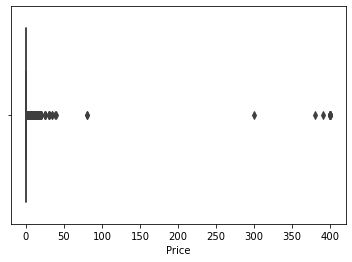

In [45]:
sns.boxplot(df['Price'])

In [46]:
df1=df.loc[df['Price'] > 300]
print(len(df1))


14


#### ii. Do you expect apps on the play store to cost  dollar 200? Check out these cases
#### answer- 15 records found where price is above dollar 200

In [47]:
df1=df.loc[df['Price'] > 200]
print(len(df1))

15


#### iii. After dropping the useless records, make the suitable plot again to identify outliers
#### answer-dropped records having price more than 200 dollars and checked again

In [48]:
df.drop(df[df['Price'] >200].index, inplace = True)

In [49]:
df1=df.loc[df['Price'] > 200]#checkin records after dropping records with price more than 200 dollars
print(len(df1))

0


<AxesSubplot:xlabel='Price'>

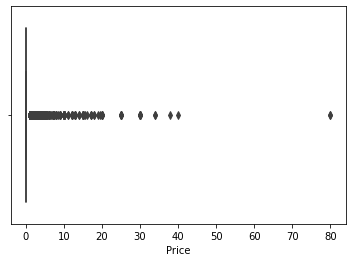

In [50]:
sns.boxplot(df['Price'])

#### v. Limit data to records with price < dollar 30
#### answer- records having price more than 30dollars removed and verified

In [51]:
df.drop(df[df['Price'] >= 30].index, inplace = True)

In [52]:
df['Price'].describe()

count    9338.000000
mean        0.301915
std         1.669887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.990000
Name: Price, dtype: float64

## b. Reviews column
#### i. Make suitable plot
#### answer- boxplot plotted and observed records present upto reviews having 78million reords

<AxesSubplot:xlabel='Reviews'>

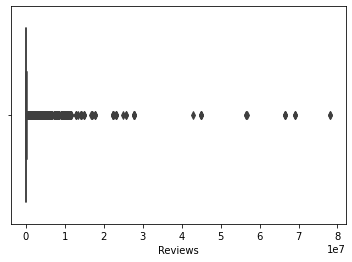

In [53]:
sns.boxplot(df['Reviews'])

In [54]:
df['Reviews'].describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### ii. Limit data to apps with < 1 Million reviews
#### answer- dropped records having reviews more than 1million reviews

In [55]:
df.shape#before removing records above 1 million reviews

(9338, 13)

In [56]:
df.drop(df[df['Reviews'] > 1000000].index, inplace = True)

In [57]:
df['Reviews'].describe()

count      8634.000000
mean      68383.348853
std      156335.806417
min           1.000000
25%         143.250000
50%        3641.000000
75%       46070.500000
max      995002.000000
Name: Reviews, dtype: float64

In [58]:
df.shape

(8634, 13)

## c. Installs
#### i. What is the 95th percentile of the installs?
#### answer-95th Percentile of Installs is 10000000.0

In [59]:
p95=np.percentile(df['Installs'],95)
print('95th Percentile of Installs is',p95)

95th Percentile of Installs is 10000000.0


#### ii. Drop records having a value more than the 95th percentile
#### answer- records having installs above the 95th percentile dropped and checked 

In [60]:
df.drop(df[df['Installs'] > 10000000 ].index,inplace=True)

In [61]:
df['Installs'].describe()

count    8.435000e+03
mean     2.077916e+06
std      3.474289e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+07
Name: Installs, dtype: float64

In [62]:
df.shape

(8435, 13)

## Data analysis to answer business questions
## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a. How do you explain this?
#### answer- The ratings plot indicates a right skewed distribution which shows mean is greater than median and mode .Maximum number of reviews are less than 2lakhs reviews which concludes 'reviews' data is skewed towards lower values .

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

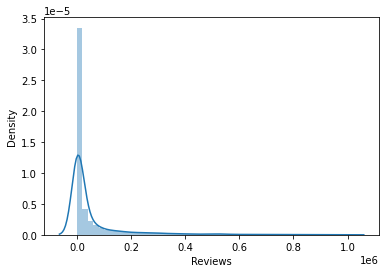

In [63]:
sns.distplot(df['Reviews'])

In [64]:
import statistics as st
print('mean is',np.mean(df['Reviews']))
print('median is',np.median(df['Reviews']))
print('mode is',st.mode(df['Reviews']))
df['Reviews'].describe()

mean is 56876.14783639597
median is 3187.0
mode is 2.0


count      8435.000000
mean      56876.147836
std      131976.112675
min           1.000000
25%         132.000000
50%        3187.000000
75%       40218.000000
max      995002.000000
Name: Reviews, dtype: float64

#### b. What is the implication of this on your analysis?
#### answer- The analysis on Reviews column shows the data is a right skewed distribution which shows mean is greater than median and mode .Maximum number of reviews are less than 2lakhs reviews which concludes 'reviews' data is skewed towards lower values and this variable must not be considered to use this data for recommending 'similar apps','you might also like' apps.


## 6. What are the top Content Rating values?
#### a. Are there any values with very few records?
#### answer-The values 'Adults only 18+','Unrated' have very few records 3 and 1 respectively calculating to less than 1percent of data.

In [65]:
df['Content Rating'].value_counts(normalize=True)*100

Everyone           80.403082
Teen               10.669828
Mature 17+          4.943687
Everyone 10+        3.935981
Adults only 18+     0.035566
Unrated             0.011855
Name: Content Rating, dtype: float64

#### b. If yes, drop those as they won’t help in the analysis
#### answer- dropped and checked the records having 'unrated' and 'adults only 18+' values

In [66]:
df.drop(df[df['Content Rating'] == 'Adults only 18+'].index,inplace=True)

In [67]:
df.drop(df[df['Content Rating'] == 'Unrated'].index,inplace=True)

In [68]:
df['Content Rating'].unique()#checking after dropping records with'unrated 'and 'adults only 18+' 

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+'], dtype=object)

## 7. Effect of size on rating
#### a. Make a joinplot to understand the effect of size on rating

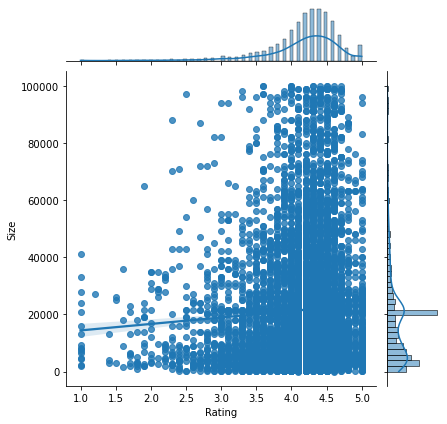

In [69]:
sns.jointplot(x=df['Rating'],y=df['Size'],data=df,kind='reg')

#### b. Do you see any patterns?


#### Answer- b- * firstly the scatter plot derived in centre shows that there is no solid relationship between' Rating' and 'size'
####           * Secondly the distribution of 'rating' plotted on top of plot horizontally shows the distribution is left skewed towards                          rating 3.5 and 5 which indicates max apps have been rated in between 4 and 4.5.
####           * Thirdly the distribution of 'size' plotted on right of plot vertically shows the distribution is right skewed towards                                  size 0 and 40000 which indicates max apps have been sized in between 0 and 40000.

#### c. How do you explain the pattern?

#### Answer- The pattern indicates that there is no relationshop between size and rating features ,also it is observed maximum apps have rating between 4 and 4.5 and maximum apps are sized between 0 to 20000 units and maximum number of maps are sizd between 20000 to 30000 units

## 8. Effect of price on rating
#### a. Make a jointplot (with regression line)

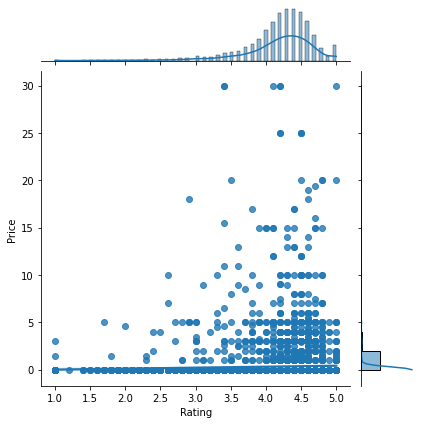

In [70]:
sns.jointplot(x=df['Rating'],y=df['Price'],data=df,kind='reg')

#### b. What pattern do you see?

#### *The plot at the centre shows that the features 'Rating' and 'Price' do not have any strong relationship.
#### *The distribution of 'rating' plotted on top of plot horizontally shows the distribution is left skewed towards rating 3.5 and 5 which indicates max apps have been rated in between 4 and 4.5.
#### *the distribution of 'price' plotted on right of plot vertically shows the distribution is heavily right skewed towards price 0  which indicates max apps have been priced 0 i.e are free.

#### c. How do you explain the pattern
#### Answer- The pattern indicates that there is no relationshop between 'Price' and 'rating' features ,also it is observed maximum apps have rating between 4 and 4.5 and maximum apps are priced 0 i.e maximum apps are free.

#### d. Replot the data, this time with only records with price > 0

In [71]:
df1= df.drop(df[df['Price'] <= 0].index)
df1=df1[['Price','Rating']]


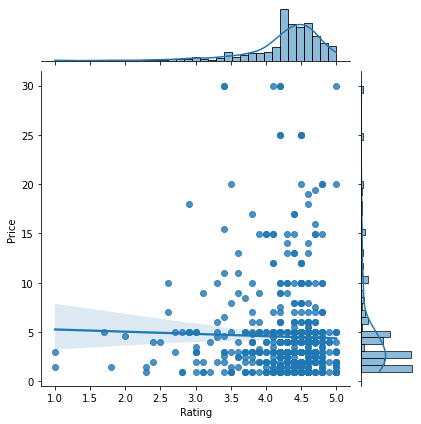

In [72]:
sns.jointplot(x=df1['Rating'],y=df1['Price'],data=df1,kind='reg')


#### e. Does the pattern change?

#### Yes the pattern slightly changes,the regression line deviates from straight line and tries to build a relationship but no profound relationship observed in the jointplot.The regression line moves from 0 to 5and above on Y axis after removng the datapoints having price as zero.

#### f. What is your overall inference on the effect of price on the rating

#### The 'Price ' and 'Rating' feature does not show any solid relationship between them,this indocates that any change in price while not affect the rating of the app.Both the features are independent of each other.

## 9. Look at all the numeric interactions together – 
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

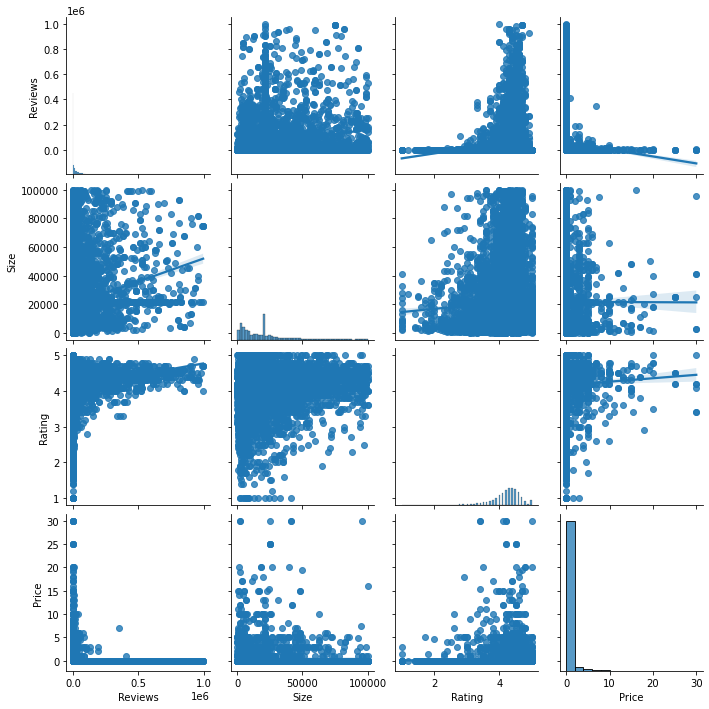

In [73]:
sns.pairplot((df[['Reviews','Size','Rating','Price']]),kind='reg')

## 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

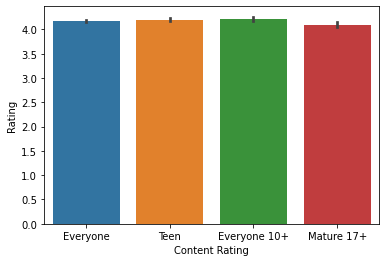

In [74]:
from numpy import mean
sns.barplot(x=df['Content Rating'],y=df['Rating'],data=df,ci=95)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

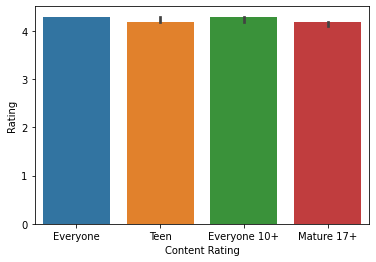

In [75]:
from numpy import median
sns.barplot(x=df['Content Rating'],y=df['Rating'],data=df,estimator= median,ci=95)

In [76]:
# from numpy import quantile
# sns.barplot(x=df['Content Rating'],y=df['Rating'],data=df,estimator=np.quantile(df,1),ci=95)

#### b. Which metric would you use? Mean? Median? Some other quantile?

In [77]:
df2=df[['Content Rating','Rating']]
df2
df2.describe()

,Rating
count,8431.000000
mean,4.170763
std,0.533942
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


#### c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

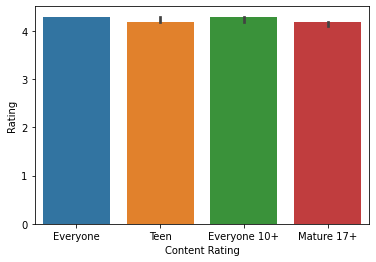

In [78]:
from numpy import mean
sns.barplot(x=df['Content Rating'],y=df['Rating'],data=df,estimator=median,ci=95)

## 11. Content rating vs. size vs. rating – 3 variables at a time
#### a. Create 5 buckets (20% records in each) based on Size

In [79]:
import numpy as np
bins = np.linspace((min(df['Size'])),(max(df['Size'])),6)
labels = ['tiny','small', 'medium', 'big','huge']

In [80]:
db = df[["Content Rating", "Size","Rating"]]

In [81]:
db['bins'] = pd.cut(df['Size'], bins=bins, labels=labels, include_lowest=True)
db.head()

,Content Rating,Size,Rating,bins
0,Everyone,19000.0,4.1,tiny
1,Everyone,14000.0,3.9,tiny
2,Everyone,8700.0,4.7,tiny
4,Everyone,2800.0,4.3,tiny
5,Everyone,5600.0,4.4,tiny


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [82]:
dt = db[["Rating", "bins"]]

In [83]:
from numpy import percentile
dg=dt.groupby(['bins']).agg(percentile_20 = ('Rating',lambda x: x.quantile(0.2)))
dg


,percentile_20
bins,
tiny,3.8
small,3.9
medium,3.9
big,4.0
huge,4.0


#### c. Make a heatmap of this
#### i. Annotated
#### ii. Greens color map

In [84]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
db['Content Rating'] = lr.fit_transform(db['Content Rating'])
db['bins'] = lr.fit_transform(db['bins'])
db.head()

,Content Rating,Size,Rating,bins
0,0,19000.0,4.1,4
1,0,14000.0,3.9,4
2,0,8700.0,4.7,4
4,0,2800.0,4.3,4
5,0,5600.0,4.4,4


<AxesSubplot:>

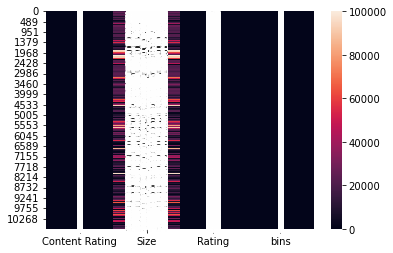

In [85]:
sns.heatmap(db,annot=True)

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

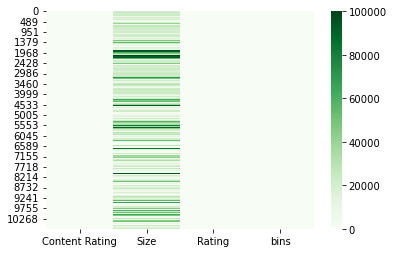

In [88]:
sns.heatmap(db, cmap="Greens")
plt.show()